In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import os
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import umap

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_combined_ft_z = pd.read_csv(os.path.join(folder_path, "features_combined_ft_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_combined_ft_mm = pd.read_csv(os.path.join(folder_path, "features_combined_ft_minmax.csv"))

#se quitan las columnas 'filename' y 'label'
df_combined_ft_mm_cl= df_combined_ft_mm.drop(columns=['filename', 'label'])
df_combined_ft_z_cl= df_combined_ft_z.drop(columns=['filename', 'label'])

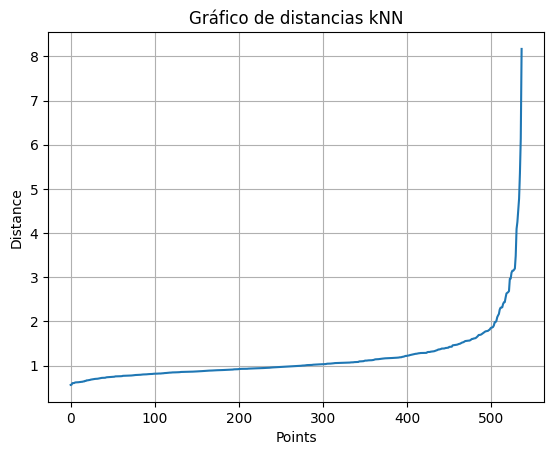

In [3]:
k = 10 #17
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_combined_ft_z_cl)
distances, indices = neighbors_fit.kneighbors(df_combined_ft_z_cl)

distances = np.sort(distances[:, k - 1])  

plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("Gráfico de distancias kNN")
plt.grid(True)
plt.show()

In [4]:
X_combined_ft_z = np.array(df_combined_ft_z_cl)

clustering = DBSCAN(eps=0.75, min_samples=6).fit(X_combined_ft_z) 
clustering.labels_

array([-1, -1, -1,  0, -1, -1,  0, -1,  0, -1,  0,  0, -1,  0, -1, -1,  0,
       -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1,  0,
        0, -1,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,
       -1,  0, -1,  0, -1, -1, -1, -1,  1, -1,  0,  0,  0, -1, -1,  0,  0,
       -1, -1, -1, -1,  0, -1, -1,  0, -1, -1,  0, -1, -1, -1,  0, -1, -1,
        0, -1, -1, -1, -1, -1,  0,  0, -1,  0,  0,  0, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,  0,
        0,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1,
        0, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1,  0,
        0, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,
       -1, -1, -1, -1,  0

In [5]:
labels = clustering.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 2
Número de puntos de ruido: 296


In [6]:
y_true = df_combined_ft_z['label'] 
y_pred = clustering.labels_     

contingency_table_z = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table_z)

Cluster DBSCAN   -1    0   1
Etiqueta Real               
higher          110  148  10
smaller         186   82   1


In [7]:
# Elimina puntos de ruido 
mask = y_pred != -1
if len(set(y_pred[mask])) > 1:
    silhouette = silhouette_score(X_combined_ft_z[mask], y_pred[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters para calcular la Silhouette (se necesita al menos 2).")

Silhouette Score (sin ruido): 0.237


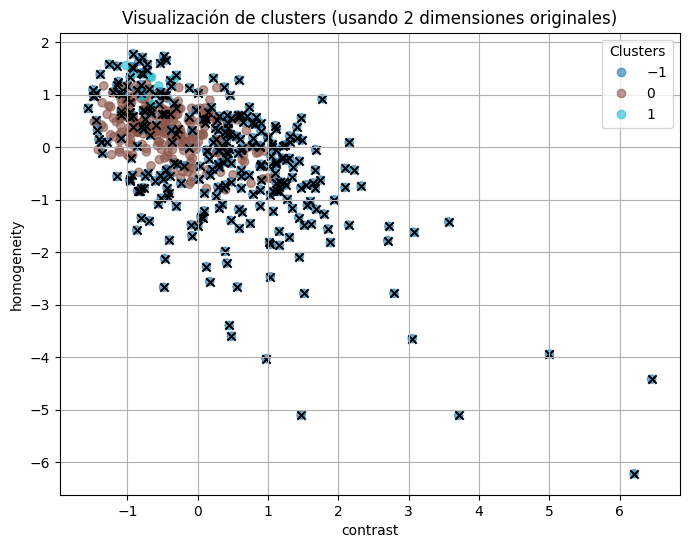

In [8]:
labels = clustering.labels_

# Convertimos a array por si aún está en DataFrame
X = df_combined_ft_z.values

# Graficamos usando las dos primeras características (columnas 0 y 1)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', alpha=0.6)

# Destacar los puntos de ruido (-1)
if -1 in labels:
    plt.scatter(X[labels == -1, 0], X[labels == -1, 1],
                c='black', marker='x', label='Ruido')

plt.title("Visualización de clusters (usando 2 dimensiones originales)")
plt.xlabel(df_combined_ft_z_cl.columns[0])
plt.ylabel(df_combined_ft_z_cl.columns[1])
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


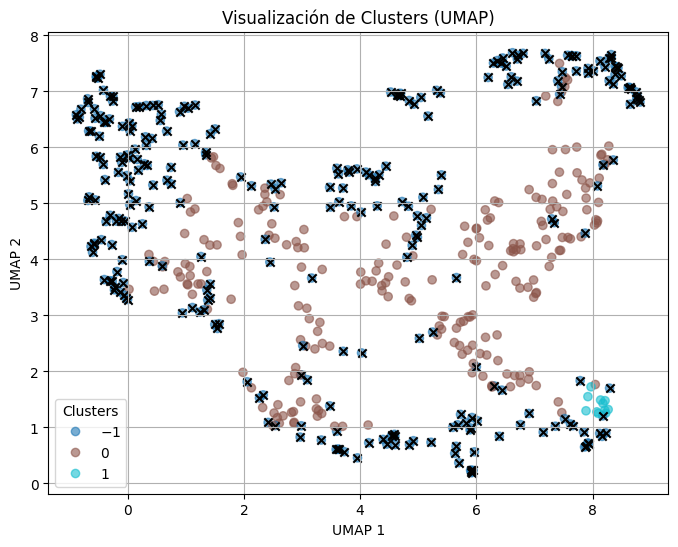

In [9]:
reducer = umap.UMAP(n_neighbors=10, n_components=2, random_state=42)
X_umap = reducer.fit_transform(df_combined_ft_z_cl)

labels = clustering.labels_  


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='tab10', alpha=0.6)

# Si hay ruido (etiqueta -1), lo destacamos
if -1 in labels:
    plt.scatter(X_umap[labels == -1, 0], X_umap[labels == -1, 1],
                c='black', marker='x', label='Ruido')

plt.title("Visualización de Clusters (UMAP)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()

min-max

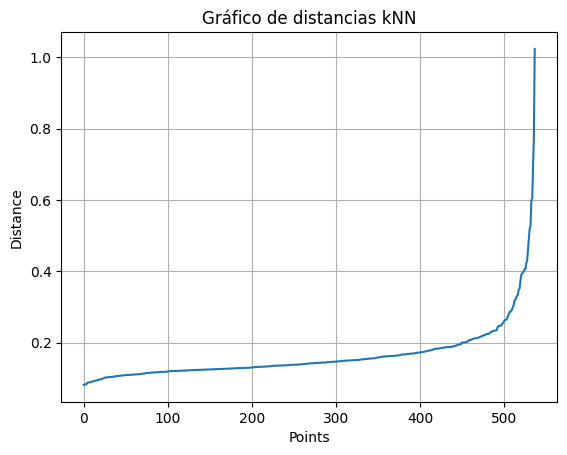

In [10]:
k = 10 #17
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_combined_ft_mm_cl)
distances, indices = neighbors_fit.kneighbors(df_combined_ft_mm_cl)

distances = np.sort(distances[:, k - 1])  

plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("Gráfico de distancias kNN")
plt.grid(True)
plt.show()

In [11]:
X_combined_ft_mm = np.array(df_combined_ft_mm_cl)

clustering_mm = DBSCAN(eps=0.15, min_samples=17).fit(X_combined_ft_mm) #1.2 #35 #
clustering_mm.labels_

array([-1, -1,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0, -1,  0, -1,  0,
        0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0,  0,  0,  0, -1,  0,  0,
       -1, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0, -1, -1,
        0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1, -1,
       -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  0, -1, -1,  0, -1, -1, -1,
        0, -1,  0,  1, -1,  0,  0, -1, -1, -1, -1, -1,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1, -1, -1,  0,  0,  0, -1,
        0,  0,  0,  0, -1, -1,  0,  0,  0, -1,  0, -1,  0,  0, -1, -1, -1,
       -1,  0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  0, -1,  0,  0, -1, -1,  0,  0,  0, -1, -1,  0,  0, -1,  0,
       -1, -1,  0, -1, -1, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0, -1, -1,
       -1,  0,  0, -1,  0

In [12]:
labels_mm = clustering_mm.labels_
n_clusters_mm = len(set(labels_mm)) - (1 if -1 in labels else 0)
n_noise_mm = list(labels_mm).count(-1)

print(f"Número de clusters: {n_clusters_mm}")
print(f"Número de puntos de ruido: {n_noise_mm}")

Número de clusters: 2
Número de puntos de ruido: 157


In [13]:
y_true = df_combined_ft_mm['label'] 
y_pred = clustering_mm.labels_     

contingency_table_mm = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table_mm)

Cluster DBSCAN   -1    0   1
Etiqueta Real               
higher           46  210  12
smaller         111  157   1


In [14]:
# Elimina puntos de ruido 
mask = y_pred != -1
if len(set(y_pred[mask])) > 1:
    silhouette = silhouette_score(X_combined_ft_mm[mask], y_pred[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters para calcular la Silhouette (se necesita al menos 2).")

Silhouette Score (sin ruido): 0.287


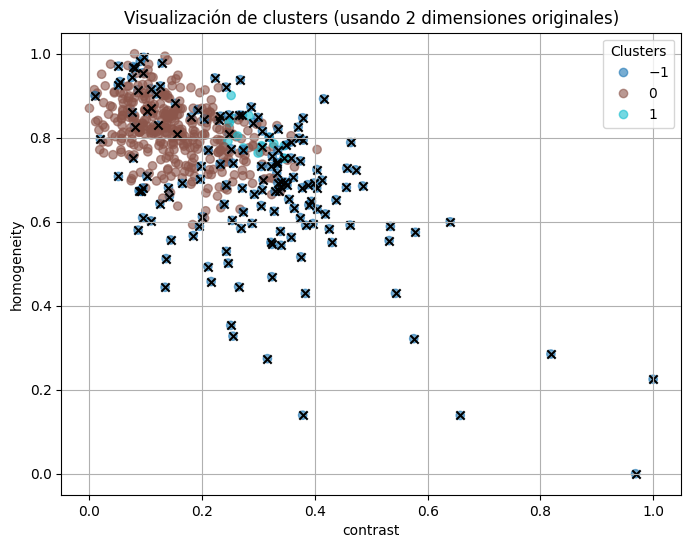

In [15]:
labels_mm = clustering_mm.labels_

# Convertimos a array por si aún está en DataFrame
X_mm = df_combined_ft_mm.values

# Graficamos usando las dos primeras características (columnas 0 y 1)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_mm[:, 0], X_mm[:, 1], c=labels_mm, cmap='tab10', alpha=0.6)

# Destacar los puntos de ruido (-1)
if -1 in labels_mm:
    plt.scatter(X_mm[labels_mm == -1, 0], X_mm[labels_mm == -1, 1],
                c='black', marker='x', label='Ruido')  # ← Corrección aquí

plt.title("Visualización de clusters (usando 2 dimensiones originales)")
plt.xlabel(df_combined_ft_mm_cl.columns[0])
plt.ylabel(df_combined_ft_mm_cl.columns[1])
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()


c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


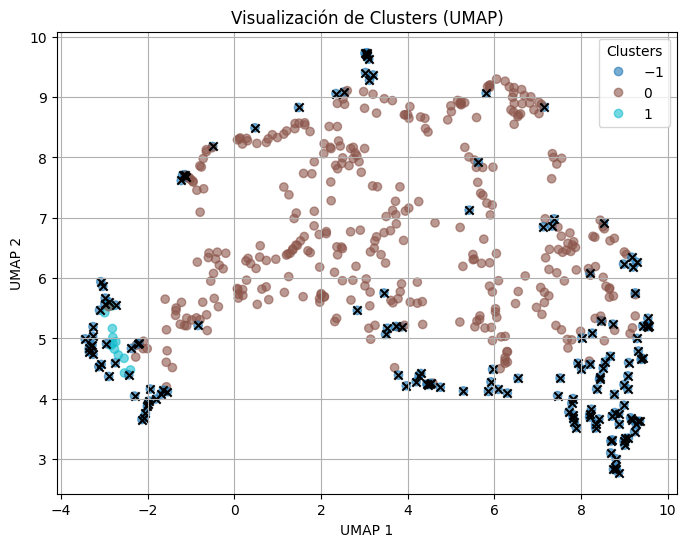

In [16]:
reducer_mm = umap.UMAP(n_neighbors=10, n_components=2, random_state=42)
X_umap_mm = reducer_mm.fit_transform(df_combined_ft_mm_cl)

labels_mm = clustering_mm.labels_  


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], c=labels_mm, cmap='tab10', alpha=0.6)

# Si hay ruido (etiqueta -1), lo destacamos
if -1 in labels_mm:
    plt.scatter(X_umap_mm[labels_mm == -1, 0], X_umap_mm[labels_mm == -1, 1],
                c='black', marker='x', label='Ruido')

plt.title("Visualización de Clusters (UMAP)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()


reduccion de la dimensionalidad con umap

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\tere1\AppData\Local\Temp\ipykernel_16004\90288856.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_zscore[:, 0], X_umap_zscore[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


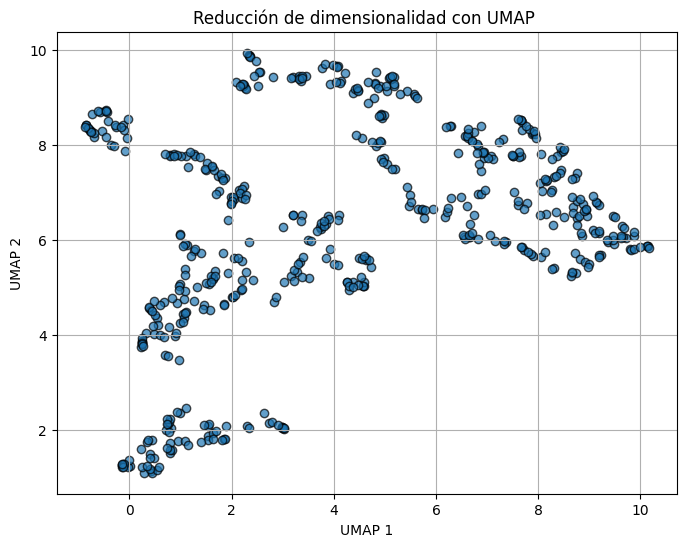

In [32]:
# Aplicar UMAP con diferentes valores de n_eighbors
umap_model_zscore = umap.UMAP(n_neighbors= 9, n_components=2,min_dist=0.01, random_state=42)  
X_umap_zscore = umap_model_zscore.fit_transform(X_combined_ft_z) 


# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_zscore[:, 0], X_umap_zscore[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [38]:
clustering_umap_z = DBSCAN(eps=0.98, min_samples=6, metric= 'manhattan').fit(X_umap_zscore) #1.4 #5 #con esta combinacion sales dos clusteres ocn la misma silueta mas o menos #0.98 #6
clustering_umap_z.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 2, 2,
       2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,

In [39]:
labels = clustering_umap_z.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 3
Número de puntos de ruido: 0


In [40]:
y_true = df_combined_ft_z['label'] 
y_pred = clustering_umap_z.labels_     

contingency_table = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table)

Cluster DBSCAN    0    1   2
Etiqueta Real               
higher           38  176  54
smaller         225   29  15


In [41]:
mask = labels != -1  # Excluir puntos de ruido

if len(set(labels[mask])) > 1:
    silhouette = silhouette_score(X_umap_zscore[mask], labels[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters (sin contar ruido) para calcular la silueta.")

Silhouette Score (sin ruido): 0.447


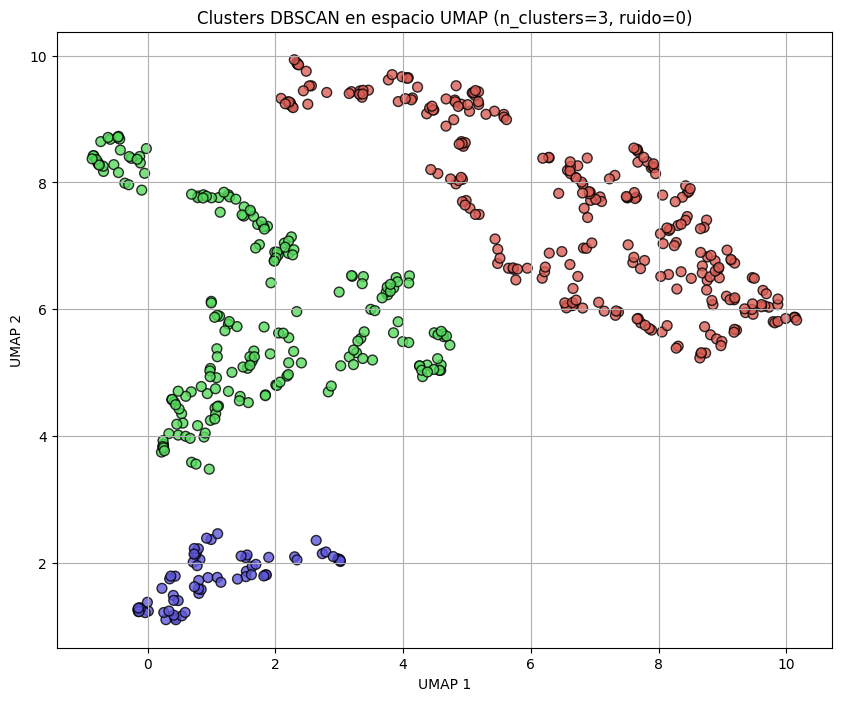

In [42]:
import seaborn as sns
# Asignar una paleta de colores que incluya un color para el ruido
unique_labels = set(labels)
colors = sns.color_palette('hls', len(unique_labels))
color_mapping = {label: colors[i] if label != -1 else (0.5, 0.5, 0.5)  # gris para ruido
                 for i, label in enumerate(unique_labels)}

# Crear lista de colores para cada punto según su etiqueta
point_colors = [color_mapping[label] for label in labels]

# Graficar
plt.figure(figsize=(10, 8))
plt.scatter(X_umap_zscore[:, 0], X_umap_zscore[:, 1],
            c=point_colors, edgecolor='k', s=50, alpha=0.8)

plt.title(f"Clusters DBSCAN en espacio UMAP (n_clusters={n_clusters}, ruido={n_noise})")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(True)
plt.show()

min-max umap + dbscan

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\tere1\AppData\Local\Temp\ipykernel_16004\871230521.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


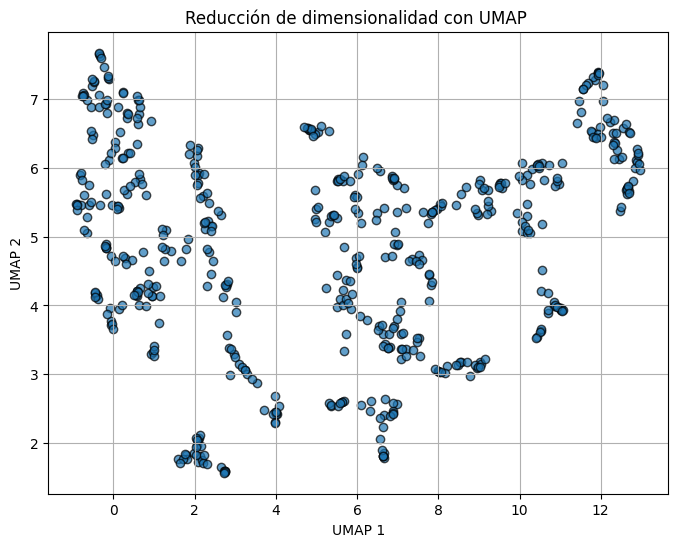

In [43]:
# Aplicar UMAP con diferentes valores de n_neighbors
umap_model_mm = umap.UMAP(n_neighbors= 8, n_components=2,min_dist=0.01, random_state=42)  #8 #2
X_umap_mm = umap_model_mm.fit_transform(X_combined_ft_mm)


# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()



In [44]:
clustering_umap_mm = DBSCAN(eps=1.4, min_samples=30).fit(X_umap_mm) #1.1 #30
clustering_umap_mm.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,

In [45]:
labels = clustering_umap_mm.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 2
Número de puntos de ruido: 0


In [46]:
y_true = df_combined_ft_mm['label'] 
y_pred = clustering_umap_mm.labels_     

contingency_table = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table)

Cluster DBSCAN    0    1
Etiqueta Real           
higher           26  242
smaller         205   64


In [47]:
mask = labels != -1  # Excluir puntos de ruido

if len(set(labels[mask])) > 1:
    silhouette = silhouette_score(X_umap_mm[mask], labels[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters (sin contar ruido) para calcular la silueta.")

Silhouette Score (sin ruido): 0.566


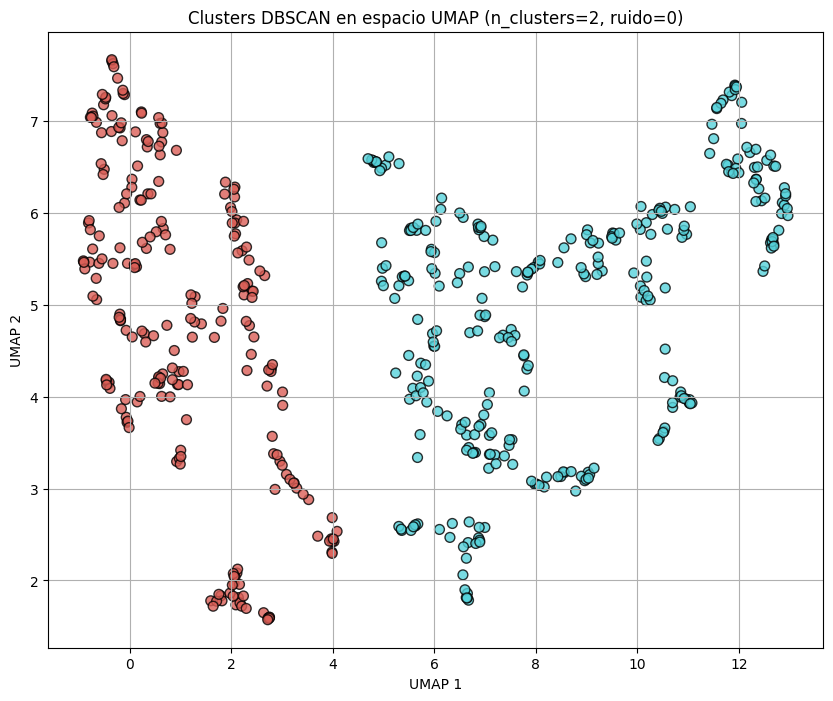

In [48]:
import seaborn as sns
# Asignar una paleta de colores que incluya un color para el ruido
unique_labels = set(labels)
colors = sns.color_palette('hls', len(unique_labels))
color_mapping = {label: colors[i] if label != -1 else (0.5, 0.5, 0.5)  # gris para ruido
                 for i, label in enumerate(unique_labels)}

# Crear lista de colores para cada punto según su etiqueta
point_colors = [color_mapping[label] for label in labels]

# Graficar
plt.figure(figsize=(10, 8))
plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1],
            c=point_colors, edgecolor='k', s=50, alpha=0.8)

plt.title(f"Clusters DBSCAN en espacio UMAP (n_clusters={n_clusters}, ruido={n_noise})")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(True)
plt.show()

con la reduccion de dimensionalidad de umap se ve mas claro, se pueden obtener dos o tres clusteres con los datos normalizados con zscore. Con los datos normalizados coon minmax se pueden ver dos clusteres